# Checklist
- Data Info
- Data Types
- Missing Values
- Duplicated Values
- Unique Values
- Distributions & Outliers
- Correlations

# Task Details
Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

# Data Source
https://www.kaggle.com/datasets/brendan45774/test-file

# Imports

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
from data_gadgets.cleaning import Cleaner
from data_gadgets.visualization import Visualizer

# Reading Data

In [3]:
path = os.path.join('..', '..', 'data', 'raw', 'data_task1.csv')
data = pd.read_csv(path)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Data Types

In [6]:
cleaner = Cleaner()
cols = cleaner.separate_data(data, 'Survived')
cols

{'target': ['Survived'],
 'time': [],
 'category': ['Sex', 'Cabin', 'Embarked'],
 'category+': ['Name', 'Ticket'],
 'continuous': ['Age', 'Fare'],
 'continuous+': ['PassengerId'],
 'discrete': ['Pclass', 'SibSp', 'Parch']}

# Missing Values

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Duplicated Values

In [8]:
data.duplicated().sum()

0

# Unique Values

In [9]:
data.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

# Distributions

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
visualizer = Visualizer()

## Time

In [12]:
try:
    visualizer.multivariate_subplots(data[cols['continuous']+cols['time']], cols['time'][0], kind='time')
except:
    pass

## Continuous

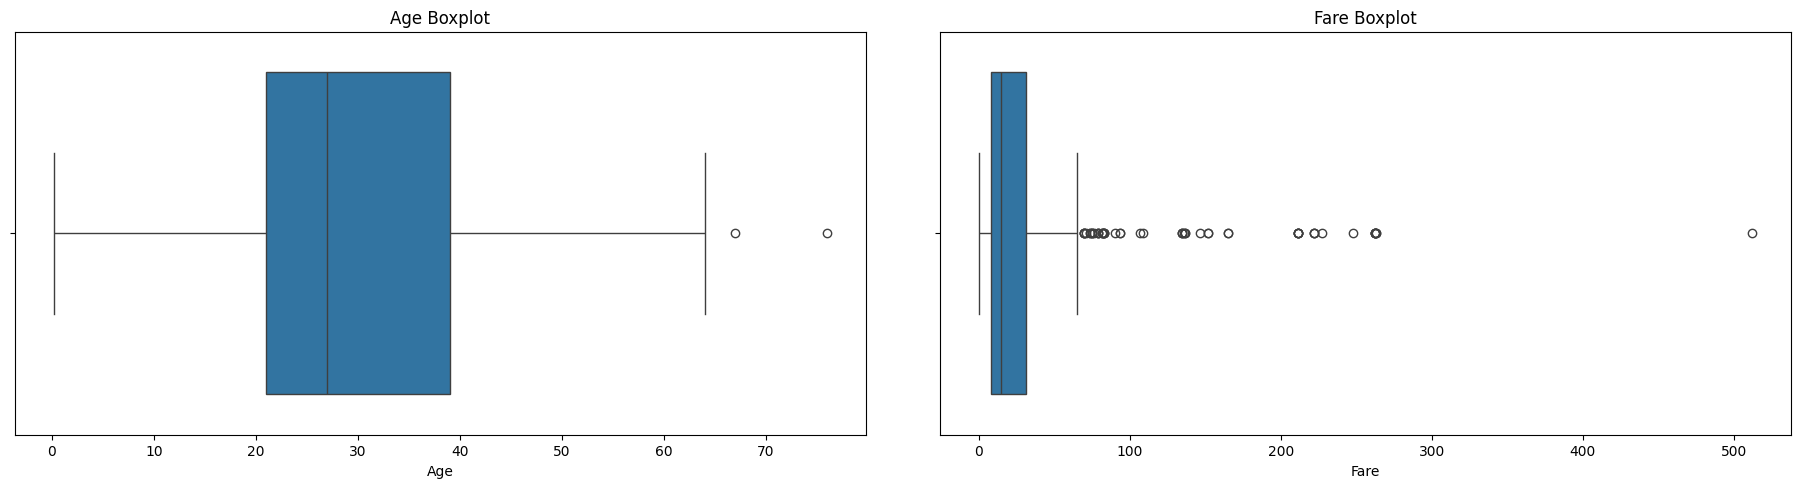

In [13]:
visualizer.univariate_subplots(data[cols['continuous']], 'boxplot', 2, 2)

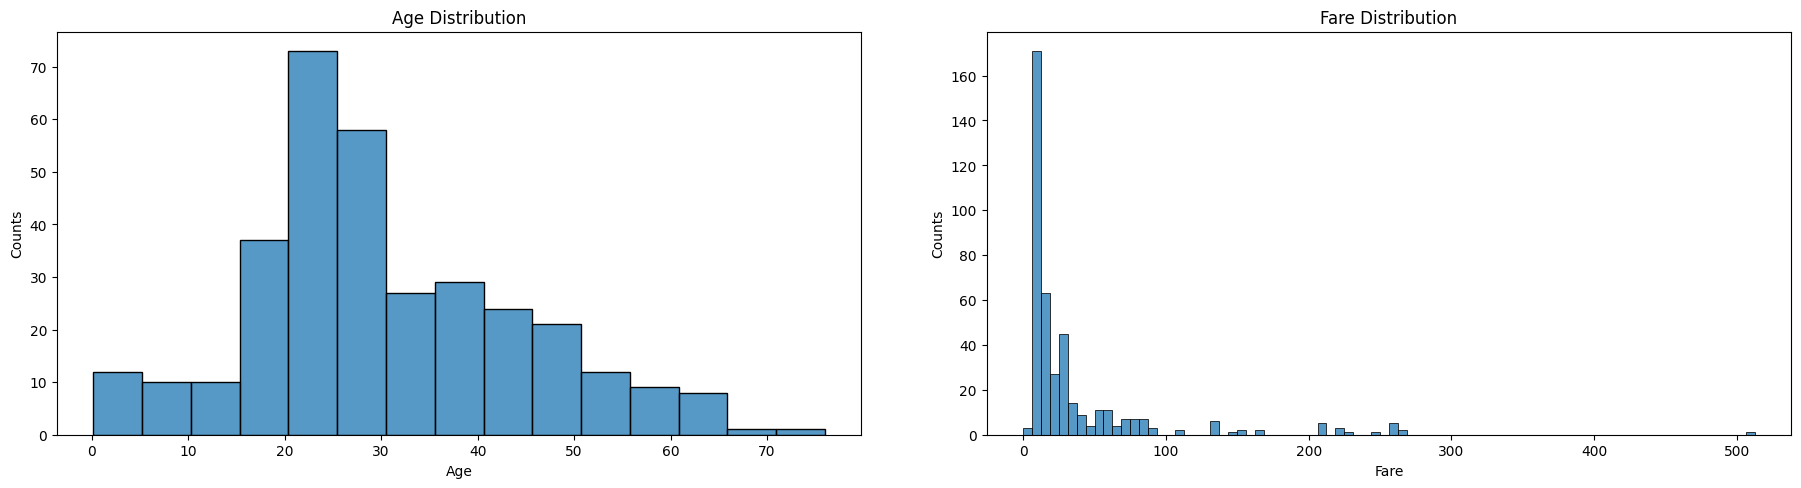

In [14]:
visualizer.univariate_subplots(data[cols['continuous']], 'numerical_counts', 2, 2)

## Discrete

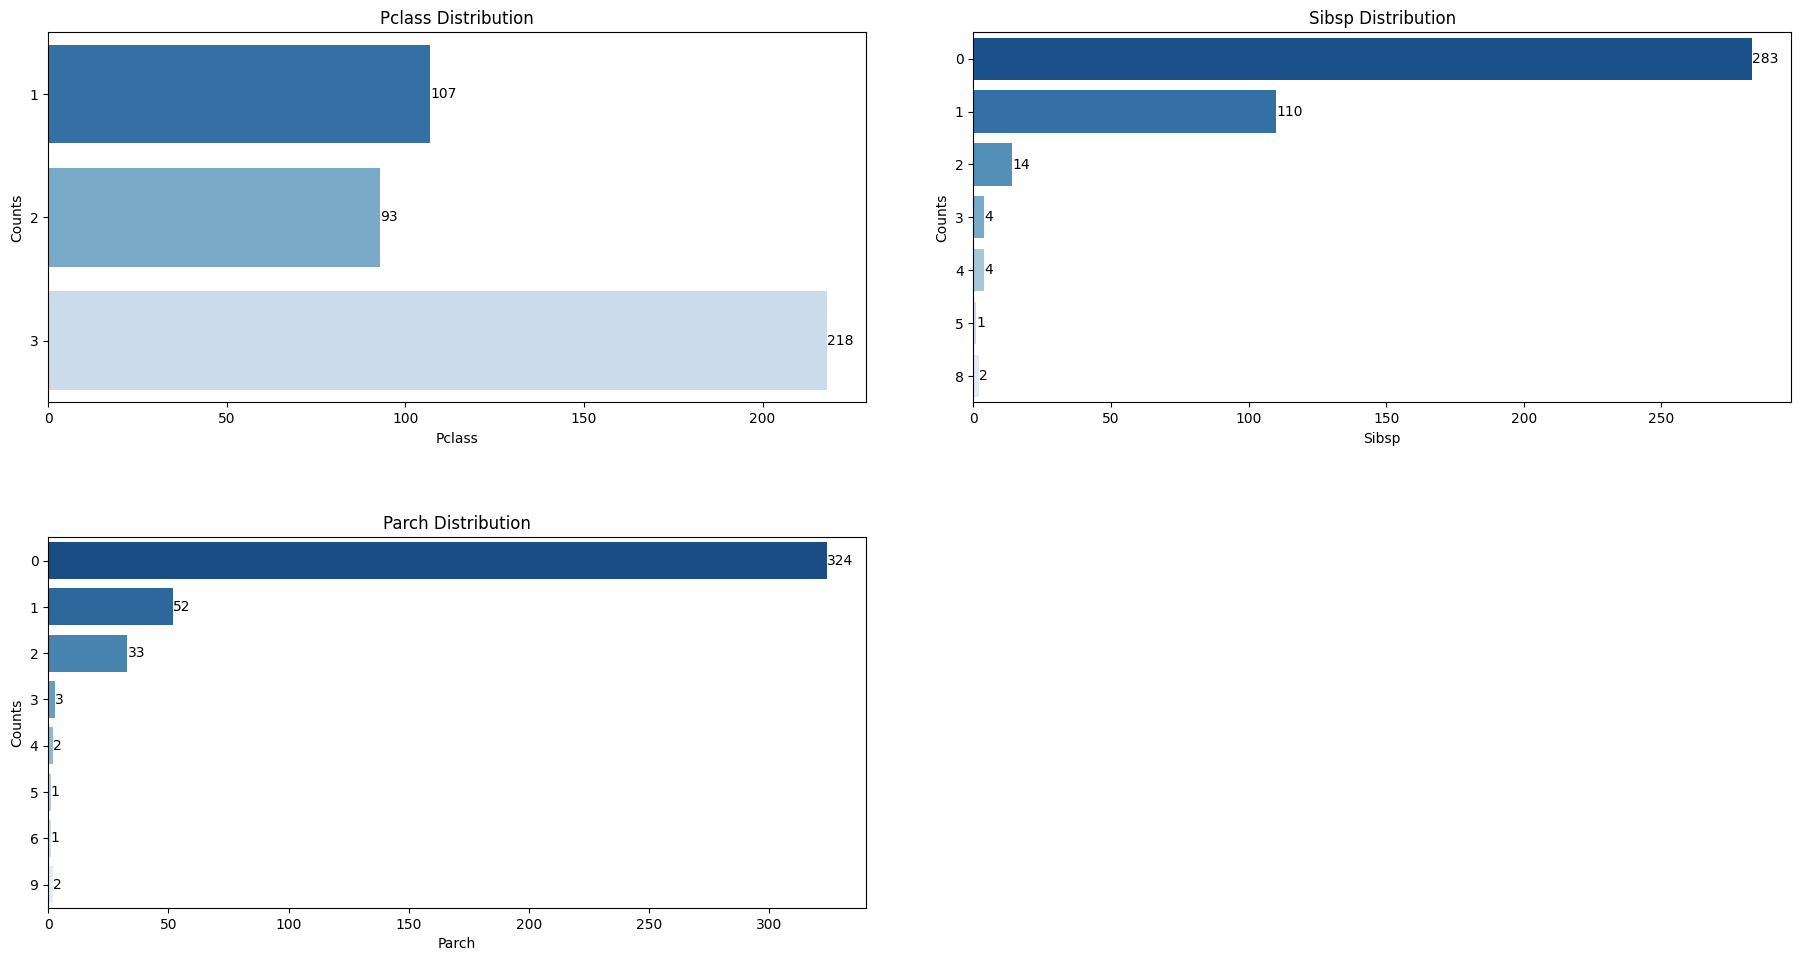

In [15]:
visualizer.univariate_subplots(data[cols['discrete']], 'category_counts', 2, 2)

## Categorical

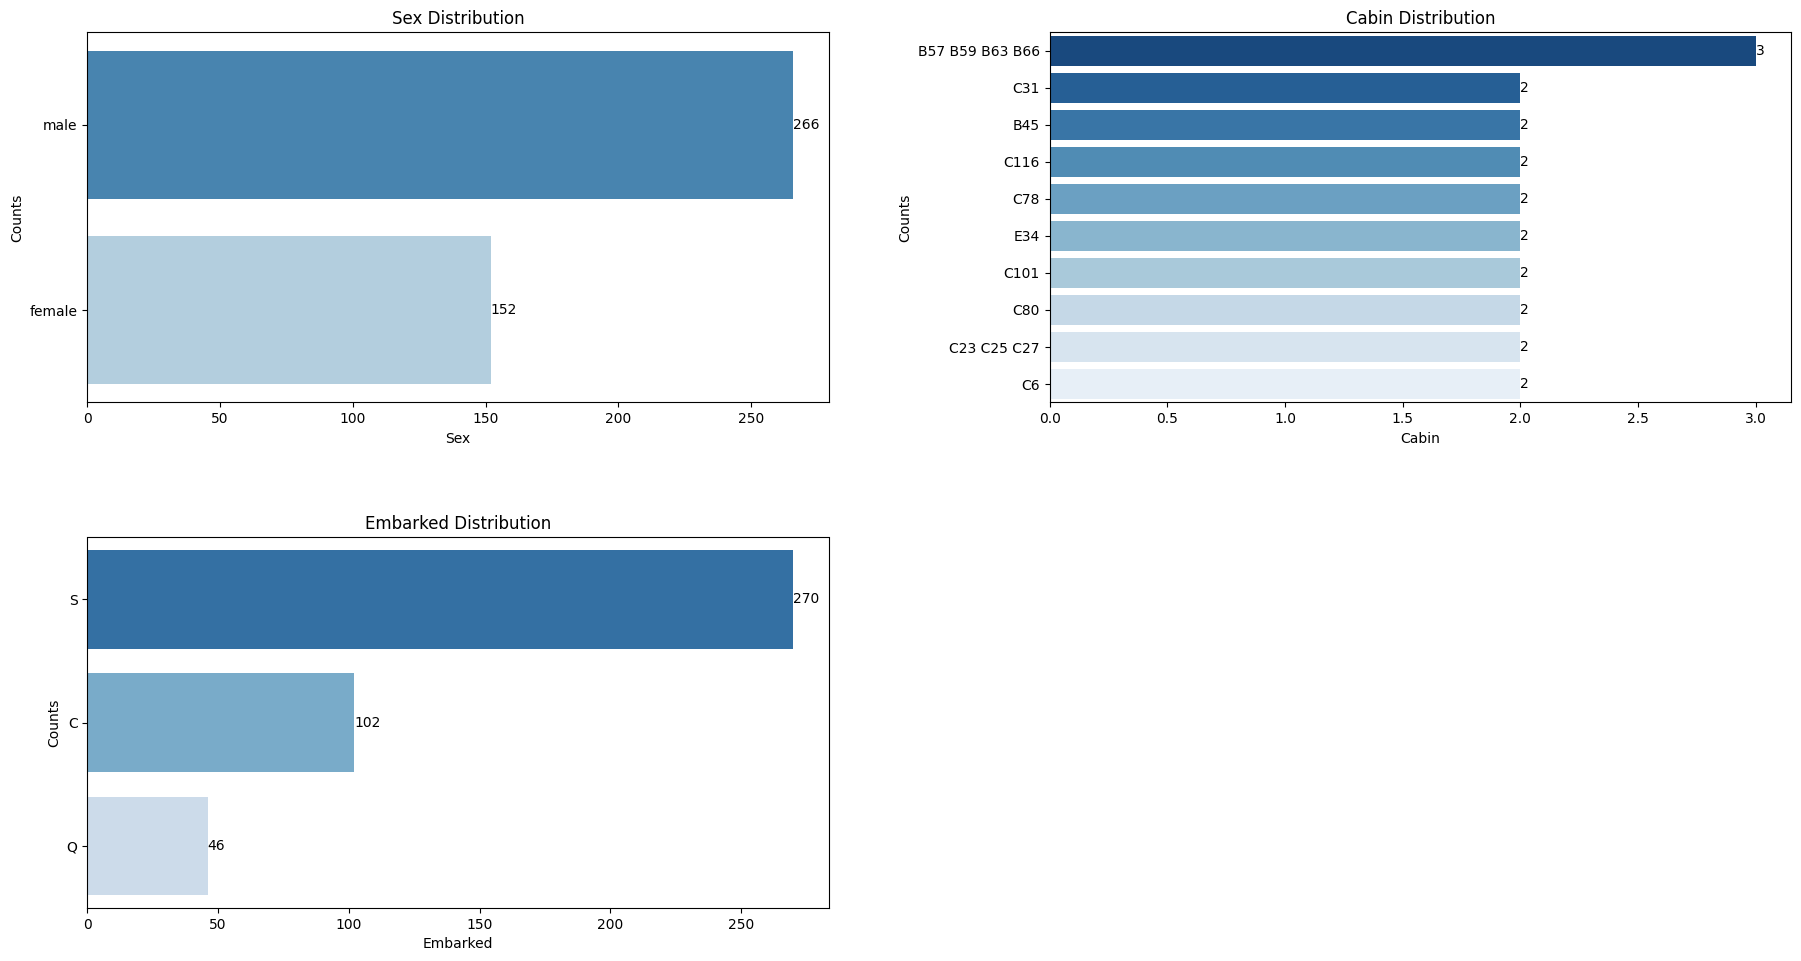

In [16]:
visualizer.univariate_subplots(data[cols['category']], 'category_counts', 2, 2)

## Target

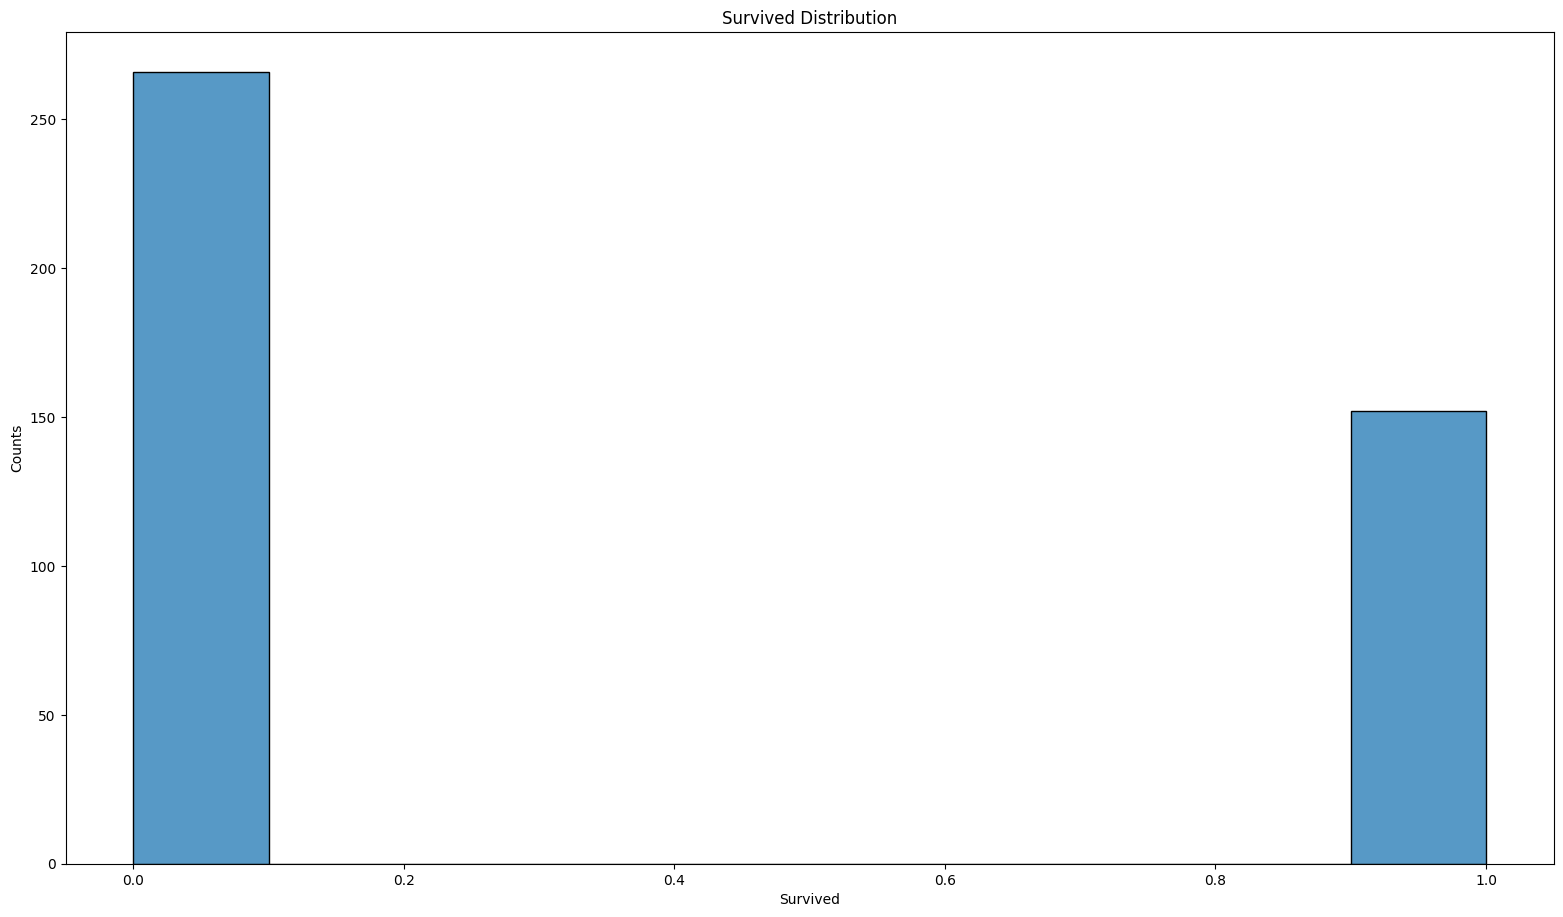

In [17]:
try:
    visualizer.numerical_counts(data, cols['target'][0])
except:
    visualizer.category_counts(data, cols['target'][0])

In [18]:
try:
    visualizer.multivariate_subplots(data[cols['time']+cols['target']], cols['time'][0], kind='time')
except:
    pass

# Correlations

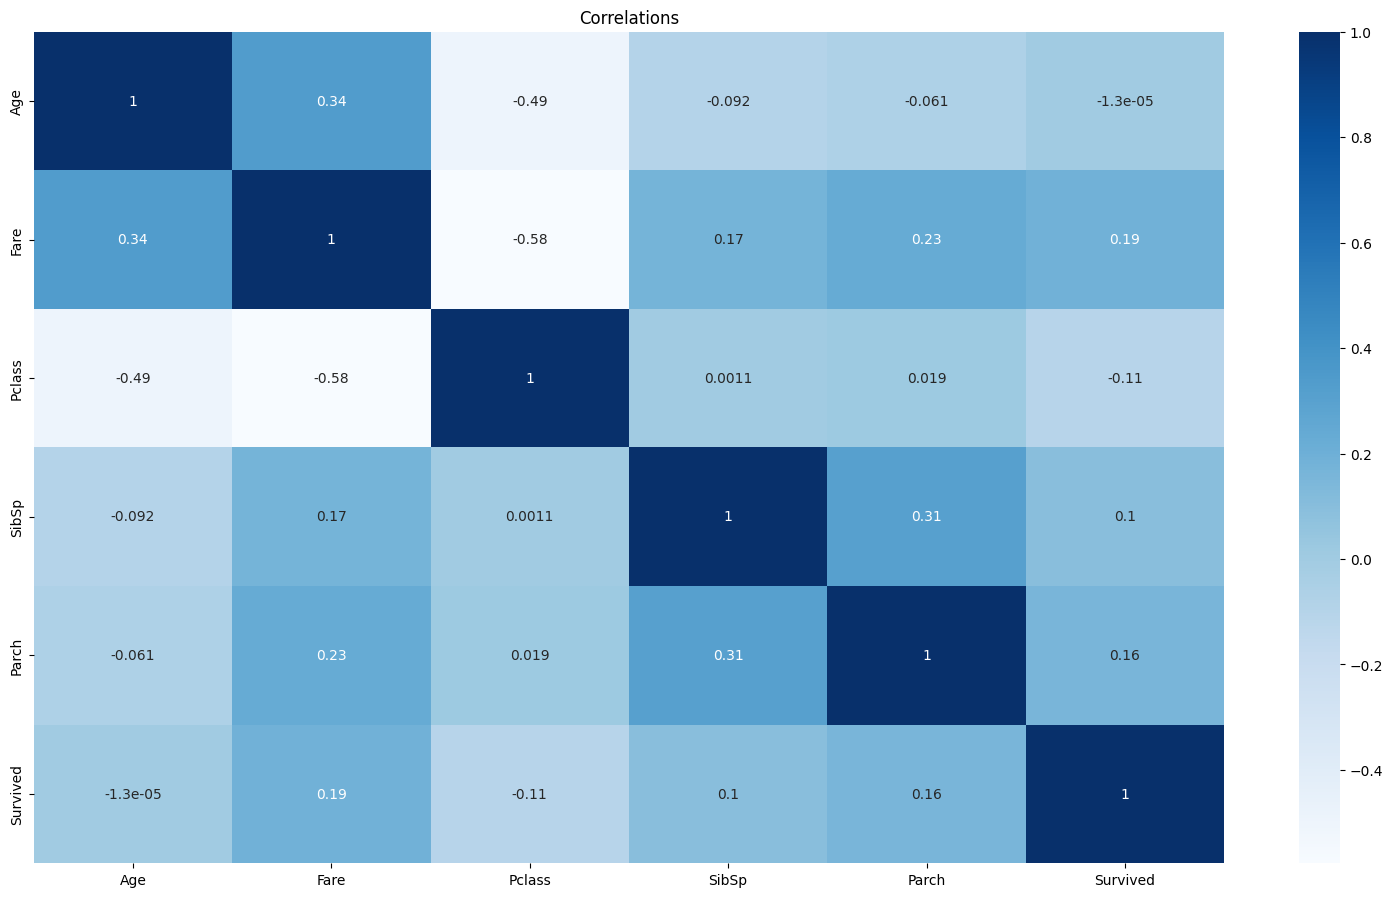

In [19]:
visualizer.correlations(data, cols['continuous']+cols['discrete']+cols['target'])

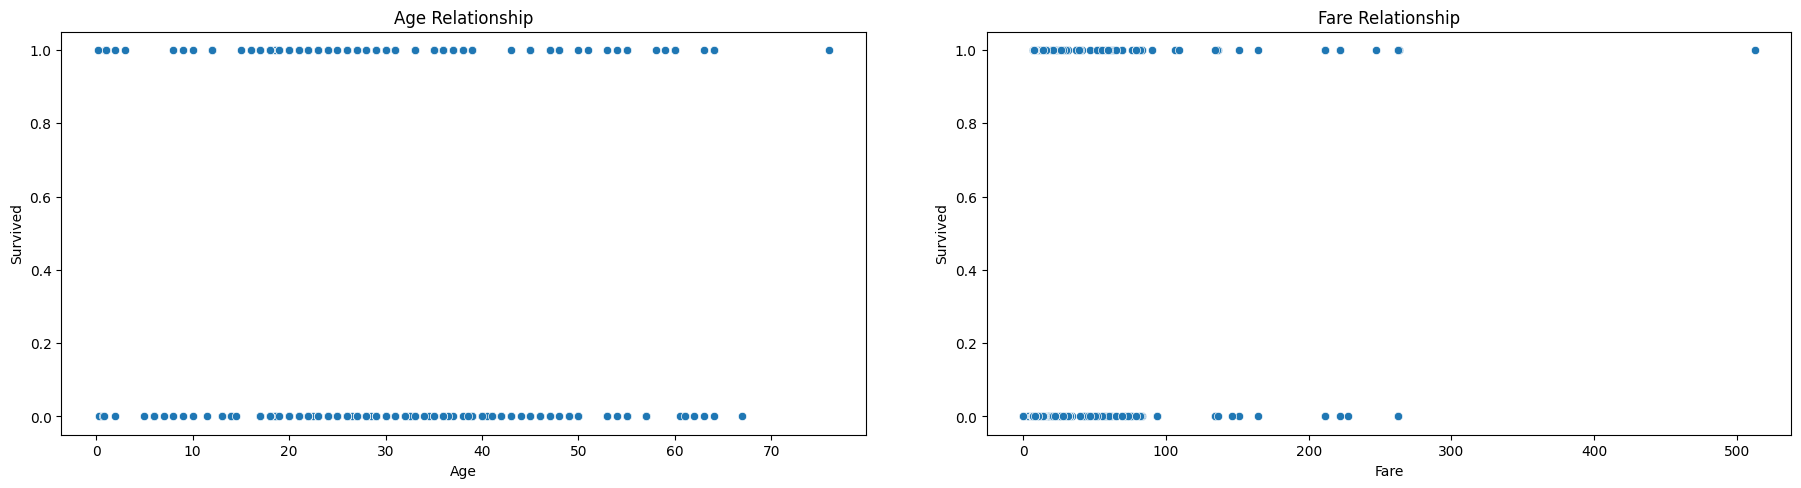

In [20]:
visualizer.multivariate_subplots(data[cols['continuous']+cols['target']], cols['target'][0], 'relationship', max_rows=2, max_cols=2)

# Conclusion
- Missing Values: Many
- Duplicated Values: None
- Outliers: Few
- Notes:
    - SbSp and Parch columns can be reduced to 2 values 0 indicating No, >=1 indicating Yes
    - Cabin column can be dropped because of too many missing values or the missing values can represent a different value
    - A new column cen be created representing age groups
    - Fare and Age columns have high negative correlation with Pclass